##1. Installing libraries



In [ ]:
!pip install imblearn

In [ ]:
!pip install catboost

In [ ]:
!pip install streamlit

In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.331s


##2. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.core.algorithms import value_counts
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import pickle
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Preparing datasets


In [ ]:
tracks = pd.read_csv("/content/drive/MyDrive/MLWork/Classify Music Using Audio Data/fma-rock-vs-hiphop.csv")
tracks.head(5)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [ ]:
tracks.info()
print('\n')
print(type(tracks))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
tracks.isnull().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [ ]:
echonest_metrics = pd.read_json("/content/drive/MyDrive/MLWork/Classify Music Using Audio Data/echonest-metrics.json", precise_float = True)
echonest_metrics.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [ ]:
echonest_metrics.info()
print('\n')
print(type(echonest_metrics))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


<class 'pandas.core.frame.DataFrame'>


In [ ]:
echonest_metrics.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [ ]:
merged_df = echonest_metrics.merge(tracks[["track_id", "genre_top"]], on = 'track_id')
merged_df.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [ ]:
merged_df.info()
print('\n')
print(type(merged_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


<class 'pandas.core.frame.DataFrame'>


In [ ]:
merged_df.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [ ]:
duplicated = merged_df.duplicated()
duplicated.sum()

0

In [ ]:
merged_df.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [ ]:
#merged_df.to_csv('merged_df.csv', index = False)

## 4. Visualizing relationships


In [ ]:
sns.set_theme(style = "darkgrid")

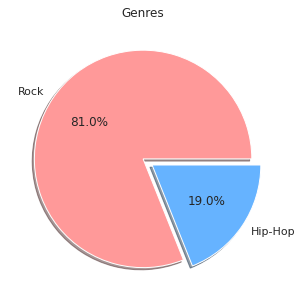

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
merged_df["genre_top"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", colors = ['#ff9999','#66b3ff'], shadow = True)
ax.set_title("Genres")
ax.set_ylabel('')
plt.show()

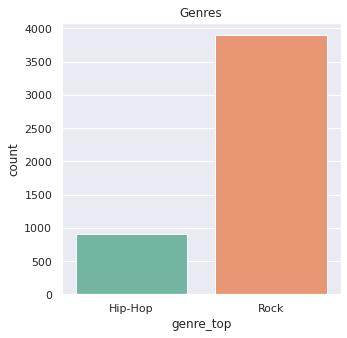

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot("genre_top", data = merged_df, palette = "Set2")
ax.set_title("Genres")
plt.show()

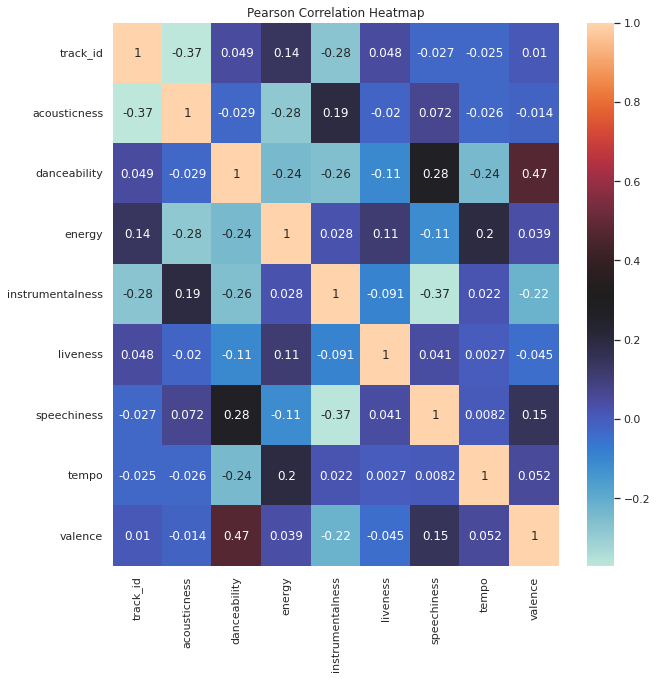

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title("Pearson Correlation Heatmap")
sns.heatmap(merged_df.corr(method = 'pearson'), annot = True, cmap = 'icefire')
plt.show()

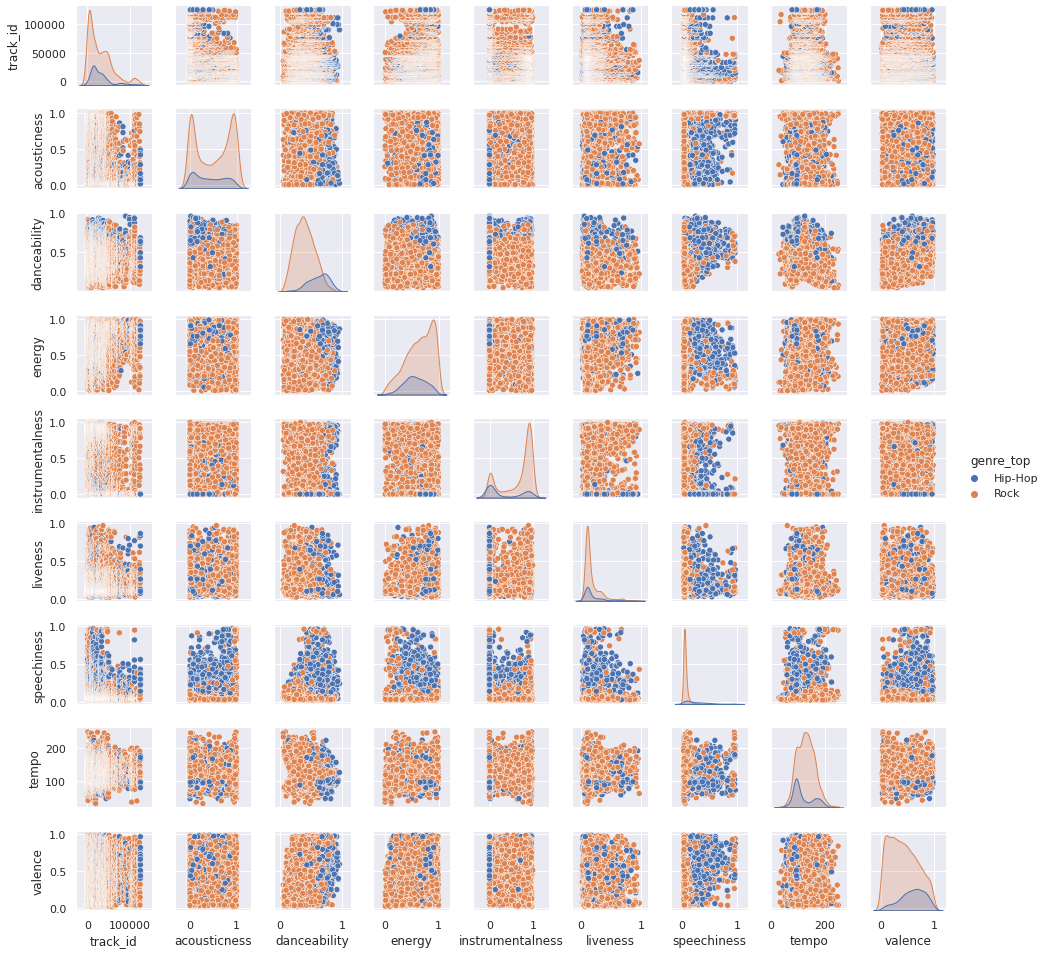

In [ ]:
sns.pairplot(merged_df, hue = "genre_top", height = 1.5)

In [ ]:
val = merged_df.groupby(["genre_top"]).mean()
val.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
genre_top,,,,,,,,,
Hip-Hop,30438.267033,0.412649,0.620385,0.562114,0.350269,0.190199,0.254705,118.632192,0.589433
Rock,30100.948356,0.504458,0.393574,0.639859,0.663444,0.187483,0.069846,128.571483,0.421610


##5. Spliting datasets


In [ ]:
X = merged_df.drop(columns = ["genre_top", "track_id"], axis = 1)
y = merged_df["genre_top"]

In [ ]:
X.head(5)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [ ]:
X.shape

(4802, 8)

In [ ]:
y.head(5)

0    Hip-Hop
1    Hip-Hop
2    Hip-Hop
3    Hip-Hop
4       Rock
Name: genre_top, dtype: object

In [ ]:
y.shape

(4802,)

##6. Data Scaling & Feature Selection

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
X_scaler.shape

(4802, 8)

In [ ]:
X_scaler

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaler, i) for i in range(X_scaler.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.173194,acousticness
1,1.649144,danceability
2,1.238074,energy
3,1.293622,instrumentalness
4,1.039791,liveness
5,1.246633,speechiness
6,1.129071,tempo
7,1.398899,valence


##7. Data Balancing

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaler, y)

Overall dataset values have been increased.
Original size:
 Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64
New size:
 Hip-Hop    3892
Rock       3892
Name: genre_top, dtype: int64


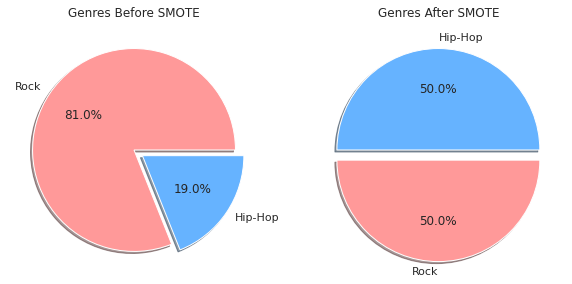

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
y.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[0], colors = ['#ff9999', '#66b3ff'], shadow = True)
ax[0].set_title("Genres Before SMOTE")
ax[0].set_ylabel('')
y_smote.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[1],  colors = ['#66b3ff', '#ff9999'], shadow = True)
ax[1].set_title("Genres After SMOTE")
ax[1].set_ylabel('')

print("Overall dataset values have been increased.")
print("Original size:\n", y.value_counts())
print("New size:\n", y_smote.value_counts())
plt.show()

##8. Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = tts(X_smote, y_smote, test_size = .33, random_state = 2022)

In [ ]:
X_train.shape, y_train.shape

((5215, 8), (5215,))

In [ ]:
X_test.shape, y_test.shape

((2569, 8), (2569,))

##9. Training on K-Neighbors

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
train_acc_knn = model_knn.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_knn*100))

The Accuracy for Training Set is 94.82262703739214


In [ ]:
test_acc_knn = accuracy_score(y_test, y_pred_knn) 
print("The Accuracy for Test Set is {}".format(test_acc_knn*100))

The Accuracy for Test Set is 92.40949785908914


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

     Hip-Hop       0.89      0.97      0.93      1311
        Rock       0.96      0.88      0.92      1258

    accuracy                           0.92      2569
   macro avg       0.93      0.92      0.92      2569
weighted avg       0.93      0.92      0.92      2569



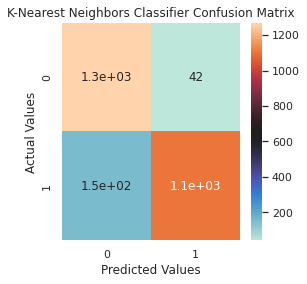

In [ ]:
plt.figure(figsize=(4,4))
plt.title("K-Nearest Neighbors Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

##10. Training on Random Forest

In [ ]:
model_rfc = RandomForestClassifier(n_jobs = None, max_depth = 25, min_samples_split = 5, random_state = 10, n_estimators= 200)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [ ]:
y_pred_rfc = model_rfc.predict(X_test)

In [ ]:
train_acc_rfc = model_rfc.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_rfc*100))

The Accuracy for Training Set is 99.88494726749761


In [ ]:
test_acc_rfc = accuracy_score(y_test, y_pred_rfc) 
print("The Accuracy for Test Set is {}".format(test_acc_rfc*100))

The Accuracy for Test Set is 94.35578045932269


In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

     Hip-Hop       0.94      0.95      0.94      1311
        Rock       0.95      0.94      0.94      1258

    accuracy                           0.94      2569
   macro avg       0.94      0.94      0.94      2569
weighted avg       0.94      0.94      0.94      2569



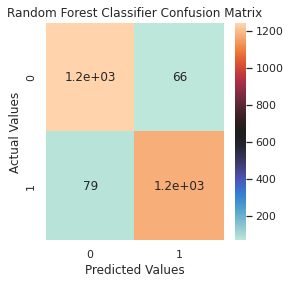

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

##11. Training on Cat Boost

In [ ]:
model_cat = CatBoostClassifier(task_type = "GPU", iterations = 5000, loss_function = 'Logloss', eval_metric ='Accuracy', random_state = 10, early_stopping_rounds = 100, od_type = "Iter")
model_cat.fit(X_train, y_train, early_stopping_rounds = 100)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.8774688	total: 47.8ms	remaining: 3m 59s
1:	learn: 0.8828380	total: 94.3ms	remaining: 3m 55s
2:	learn: 0.8878236	total: 143ms	remaining: 3m 57s
3:	learn: 0.8899329	total: 188ms	remaining: 3m 54s
4:	learn: 0.8906999	total: 233ms	remaining: 3m 53s
5:	learn: 0.8924257	total: 281ms	remaining: 3m 53s
6:	learn: 0.8931927	total: 339ms	remaining: 4m 1s
7:	learn: 0.8958773	total: 383ms	remaining: 3m 58s
8:	learn: 0.8983701	total: 425ms	remaining: 3m 55s
9:	learn: 0.8997124	total: 469ms	remaining: 3m 54s
10:	learn: 0.8989453	total: 515ms	remaining: 3m 53s
11:	learn: 0.8991371	total: 557ms	remaining: 3m 51s
12:	learn: 0.8972196	total: 599ms	remaining: 3m 49s
13:	learn: 0.8977948	total: 644ms	remaining: 3m 49s
14:	learn: 0.8966443	total: 683ms	remaining: 3m 46s
15:	learn: 0.8972196	total: 724ms	remaining: 3m 45s
16:	learn: 0.8964525	total: 774ms	remaining: 3m 46s
17:	learn: 0.8972196	total: 813ms	remaining: 3m 44s
18:	learn: 0.8999041	t

In [ ]:
model_cat.tree_count_

5000

In [ ]:
y_pred_cat = model_cat.predict(X_test)

In [ ]:
train_acc_cat = model_cat.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_cat*100))

The Accuracy for Training Set is 98.10162991371045


In [ ]:
test_acc_cat = accuracy_score(y_test, y_pred_cat) 
print("The Accuracy for Test Set is {}".format(test_acc_cat*100))

The Accuracy for Test Set is 94.23900350330868


In [ ]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

     Hip-Hop       0.94      0.95      0.94      1311
        Rock       0.95      0.93      0.94      1258

    accuracy                           0.94      2569
   macro avg       0.94      0.94      0.94      2569
weighted avg       0.94      0.94      0.94      2569



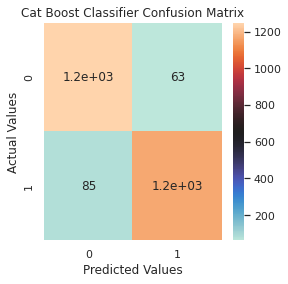

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Cat Boost Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_cat), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [ ]:
def plot_feature_importance(importance, names, model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize = (10,8))
    sns.barplot(x = fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE') 
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

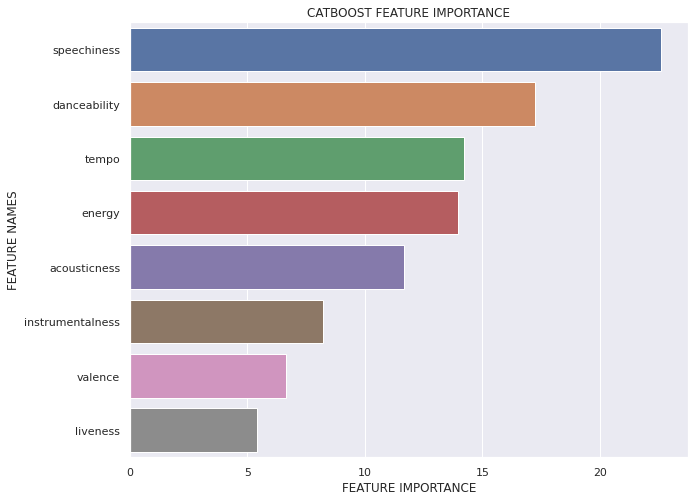

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(), X.columns, 'CATBOOST')

##12. Hyperparameter Tuning on Cat Boost

In [ ]:
model_cat_rcv = CatBoostClassifier()

params = {'depth': sp_randInt(4, 10),
          'learning_rate': sp_randFloat(),
          'iterations': sp_randInt(100, 10000)}
        
randm = RandomizedSearchCV(estimator = model_cat_rcv, param_distributions = params, cv = 5, n_iter = 10, n_jobs = -1, random_state = 10)
randm.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
1999:	learn: 0.0031177	total: 27.2s	remaining: 1m 8s
2000:	learn: 0.0031176	total: 27.2s	remaining: 1m 8s
2001:	learn: 0.0031176	total: 27.2s	remaining: 1m 8s
2002:	learn: 0.0031176	total: 27.3s	remaining: 1m 8s
2003:	learn: 0.0031176	total: 27.3s	remaining: 1m 7s
2004:	learn: 0.0031176	total: 27.3s	remaining: 1m 7s
2005:	learn: 0.0031176	total: 27.3s	remaining: 1m 7s
2006:	learn: 0.0031176	total: 27.3s	remaining: 1m 7s
2007:	learn: 0.0031175	total: 27.3s	remaining: 1m 7s
2008:	learn: 0.0031175	total: 27.3s	remaining: 1m 7s
2009:	learn: 0.0031175	total: 27.4s	remaining: 1m 7s
2010:	learn: 0.0031175	total: 27.4s	remaining: 1m 7s
2011:	learn: 0.0031175	total: 27.4s	remaining: 1m 7s
2012:	learn: 0.0031136	total: 27.4s	remaining: 1m 7s
2013:	learn: 0.0031135	total: 27.4s	remaining: 1m 7s
2014:	learn: 0.0031135	total: 27.4s	remaining: 1m 7s
2015:	learn: 0.0031135	total: 27.4s	remaining: 1m 7s
2016:	learn: 0.0031134	total: 27.4s	remaining: 1

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fe131d38e90>,
                   n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe12debcfd0>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe12de5df50>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe131a74e10>},
                   random_state=10)

In [ ]:
print("Best Estimator: \n", randm.best_estimator_)
print("Best Score: \n", randm.best_score_)
print("Best Paramters: \n", randm.best_params_)

Best Estimator: 
Best Score: 
 0.9509108341323106
Best Paramters: 
 {'depth': 9, 'iterations': 6999, 'learning_rate': 0.14217004760152696}


In [ ]:
best_params = randm.best_params_
best_params

{'depth': 9, 'iterations': 6999, 'learning_rate': 0.14217004760152696}

In [ ]:
model_cat_hp = CatBoostClassifier(**best_params, task_type = "GPU", loss_function = 'Logloss', eval_metric ='Accuracy', random_state = 10)
model_cat_hp.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
2137:	learn: 0.9996165	total: 2m 57s	remaining: 6m 44s
2138:	learn: 0.9996165	total: 2m 57s	remaining: 6m 43s
2139:	learn: 0.9996165	total: 2m 57s	remaining: 6m 43s
2140:	learn: 0.9996165	total: 2m 57s	remaining: 6m 43s
2141:	learn: 0.9996165	total: 2m 57s	remaining: 6m 43s
2142:	learn: 0.9996165	total: 2m 57s	remaining: 6m 43s
2143:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2144:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2145:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2146:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2147:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2148:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2149:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2150:	learn: 0.9996165	total: 2m 58s	remaining: 6m 43s
2151:	learn: 0.9996165	total: 2m 58s	remaining: 6m 42s
2152:	learn: 0.9996165	total: 2m 58s	remaining: 6m 42s
2153:	learn: 0.9996165	total: 2m 59s	remaining: 6m 42s
2154:	learn: 0

In [ ]:
model_cat_hp.tree_count_

6999

In [ ]:
y_pred_cat_hp = model_cat_hp.predict(X_test)

In [ ]:
train_acc_cat_hp = model_cat_hp.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc_cat_hp*100))

The Accuracy for Training Set is 99.98082454458293


In [ ]:
test_acc_cat_hp = accuracy_score(y_test, y_pred_cat_hp) 
print("The Accuracy for Test Set is {}".format(test_acc_cat_hp*100))

The Accuracy for Test Set is 94.51148306734137


In [ ]:
print(classification_report(y_test, y_pred_cat_hp))

              precision    recall  f1-score   support

     Hip-Hop       0.93      0.96      0.95      1311
        Rock       0.96      0.93      0.94      1258

    accuracy                           0.95      2569
   macro avg       0.95      0.94      0.95      2569
weighted avg       0.95      0.95      0.95      2569



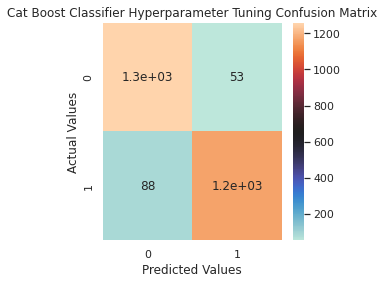

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Cat Boost Classifier Hyperparameter Tuning Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_cat_hp), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

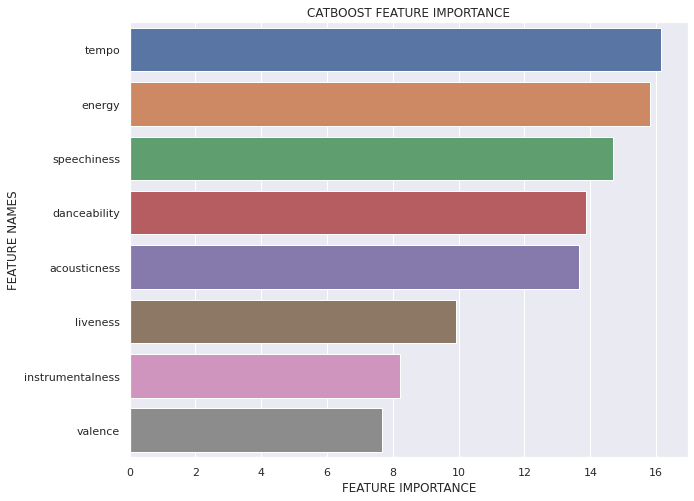

In [ ]:
plot_feature_importance(model_cat_hp.get_feature_importance(), X.columns, 'CATBOOST')

##13. Ensemble Learning

In [ ]:
model_vote = VotingClassifier(estimators = [('knn', model_knn), ('rfc', model_rfc), ("cat", model_cat_hp)], voting = 'hard')

In [ ]:
for model in (model_knn, model_rfc, model_cat_hp, model_vote):
  model.fit(X_train, y_train)
  y_pred_vote = model.predict(X_test)
  train_acc_model = model.score(X_train, y_train)
  test_acc_model = accuracy_score(y_test, y_pred_vote) 

Streaming output truncated to the last 5000 lines.
1999:	learn: 0.9994247	total: 2m 48s	remaining: 7m 2s
2000:	learn: 0.9994247	total: 2m 49s	remaining: 7m 2s
2001:	learn: 0.9994247	total: 2m 49s	remaining: 7m 2s
2002:	learn: 0.9994247	total: 2m 49s	remaining: 7m 1s
2003:	learn: 0.9994247	total: 2m 49s	remaining: 7m 1s
2004:	learn: 0.9994247	total: 2m 49s	remaining: 7m 1s
2005:	learn: 0.9994247	total: 2m 49s	remaining: 7m 1s
2006:	learn: 0.9994247	total: 2m 49s	remaining: 7m 1s
2007:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2008:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2009:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2010:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2011:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2012:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2013:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2014:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2015:	learn: 0.9994247	total: 2m 49s	remaining: 7m
2016:	learn: 0.9994247	total: 2m 49s	remaining: 6m 59s
201

In [ ]:
print("The Accuracy for Training Set is {}".format(train_acc_model*100))

The Accuracy for Training Set is 99.88494726749761


In [ ]:
print("The Accuracy for Test Set is {}".format(test_acc_model*100))

The Accuracy for Test Set is 94.86181393538342


In [ ]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

     Hip-Hop       0.94      0.96      0.95      1311
        Rock       0.96      0.93      0.95      1258

    accuracy                           0.95      2569
   macro avg       0.95      0.95      0.95      2569
weighted avg       0.95      0.95      0.95      2569



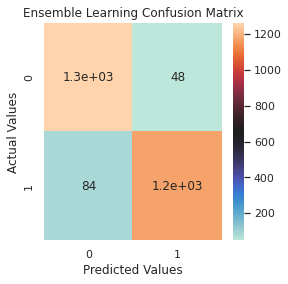

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Ensemble Learning Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred_vote), annot = True, cmap ='icefire')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

##14. Comparing Testing Accuracy of all Models

In [ ]:
print("The Accuracy of KNighborsClassifier for Test Set is {}".format(test_acc_knn*100))
print("The Accuracy of RandomForestClassifier for Test Set is {}".format(test_acc_rfc*100))
print("The Accuracy of CatBoostClassifier for Test Set is {}".format(test_acc_cat*100))
print("The Accuracy of CatBoostClassifier with HPT for Test Set is {}".format(test_acc_cat_hp*100))
print("The Accuracy of Ensemble Learning for Test Set is {}".format(test_acc_model*100))

The Accuracy of KNighborsClassifier for Test Set is 92.40949785908914
The Accuracy of RandomForestClassifier for Test Set is 94.35578045932269
The Accuracy of CatBoostClassifier for Test Set is 94.23900350330868
The Accuracy of CatBoostClassifier with HPT for Test Set is 94.51148306734137
The Accuracy of Ensemble Learning for Test Set is 94.86181393538342


##15. Prediction

In [ ]:
input_data = (0.374408, 0.528643, 0.817461, 0.001851, 0.105880, 0.461818, 126.957, 0.589433)

In [ ]:
ex = np.asarray(input_data)

In [ ]:
reshape_ex = ex.reshape(1,-1)

In [ ]:
scale_ex = scaler.transform(reshape_ex)

In [ ]:
prdctn = model.predict(scale_ex)
prdctn

array(['Hip-Hop'], dtype=object)

In [ ]:
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

##16. Application File

In [ ]:
%%writefile app.py

import numpy as np
import pandas as pd
import streamlit as st
import pickle

pickle_in = open("model.pkl", "rb")
model = pickle.load(pickle_in)

def welcome():
    return "Welcome All"

def predict_genres(acousticness, dancebility, energy, instrumentalness, liveness, speechiness, tempo, valence):
    
    """Let's Classify Music genres using these parameters
    """
    prediction = model.predict([[acousticness, dancebility, energy, instrumentalness, liveness, speechiness, tempo, valence]])
    print(prediction)
    return prediction

def main():
    st.title("Classify Music Data Using Audio Data")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Music Classifier App </h2>
    </div>
    """
    st.markdown(html_temp,  unsafe_allow_html=True)
    acousticness = st.text_input("Acousticness", "")
    danceability = st.text_input("Danceability", "")
    energy = st.text_input("Energy", "")
    instrumentalness = st.text_input("Instrumentalness", "")
    liveness = st.text_input("Liveness", "")
    speechiness = st.text_input("Speechiness", "")
    tempo = st.text_input("Tempo", "")
    valence = st.text_input("Valence", "")
    result=""
    if st.button("Predict"):
        result=predict_genres(acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Made with love by the students of NMIMS Indore <3")


if __name__ == '__main__':
  main()

Writing app.py


In [ ]:
!ls

app.py	catboost_info  drive  merged_df.csv  model.pkl	sample_data


##17. Deployment on Streamlit

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-03-14 17:47:52.945 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.22s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.241.177.78:8501

your url is: https://silent-cow-30.loca.lt
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
['Rock']
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
['Rock']
